## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1\.
Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [28]:
data = pd.read_csv('data_000637.txt')
N_max = data.size
df = data[:10000]
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


### 2\.
Find out the number of BX in a ORBIT (the value 'x').

In [29]:
val = df['ORBIT_CNT'].unique()
conversions = np.array([ (df['BX_COUNTER'][df['ORBIT_CNT']==v]).max() for v in val ])
BX_per_orbit = np.max(conversions)
print('the estimated value of x is: ', BX_per_orbit )

the estimated value of x is:  3563


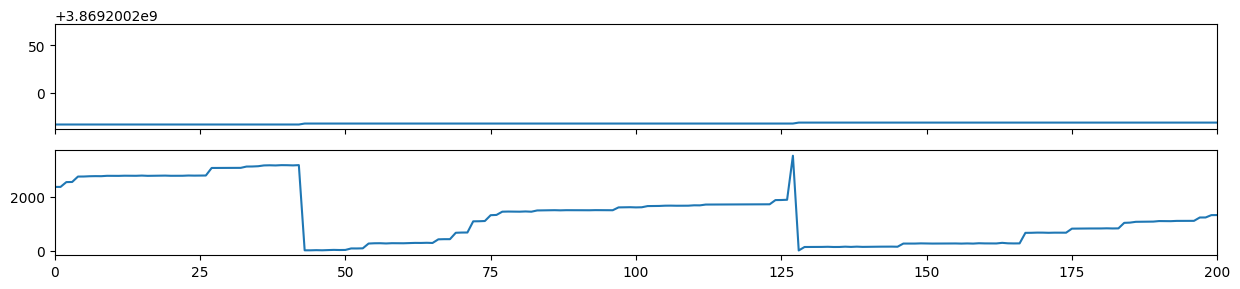

In [30]:
fig, ax = plt.subplots( 2,1, sharex=True, figsize = (15,3))
ax[0].plot( df['ORBIT_CNT'])
ax[1].plot(df['BX_COUNTER'] )
ax[1].set_xlim(0,200)
#plt.hlines( BX_per_orbit, df['ORBIT_CNT'].min() ,df['ORBIT_CNT'].max() )
plt.show()

In [31]:
s_per_tdc = (df['TDC_MEAS'].unique()).max()
print(s_per_tdc)

29


### 3\.
Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [32]:
orbit_cnt = ( df['ORBIT_CNT']-df['ORBIT_CNT'].min() )*BX_per_orbit*25 # ns
bx_counter = df['BX_COUNTER']*25 # ns
tdc_means = df['TDC_MEAS']*s_per_tdc # ns
time = np.asarray(orbit_cnt + bx_counter + tdc_means)
print('the data taking lasted: ', (time[-1]-time[0])*10**(-6),' seconds')

the data taking lasted:  8.867198  seconds


### 4\.
Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [33]:
df.assign(time = time)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,60104
1,1,0,124,3869200167,2374,27,60133
2,1,0,63,3869200167,2553,28,64637
3,1,0,64,3869200167,2558,19,64501
4,1,0,64,3869200167,2760,25,69725
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,8925219
9996,1,0,60,3869200267,701,5,8925170
9997,1,0,59,3869200267,707,23,8925842
9998,1,0,63,3869200267,706,15,8925585


### 5\.
Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [34]:
print( np.random.choice([0,1],df.shape[0]) )
df['HEAD']= np.random.choice([0,1],df.shape[0])
df

[0 1 1 ... 0 1 0]


C:\Users\ecica\AppData\Local\Temp\ipykernel_8368\2923328113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HEAD']= np.random.choice([0,1],df.shape[0])


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,0,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,0,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,0,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


### 6\.
Create a new DataFrame that contains only the rows with HEAD=1.

In [35]:
new_df = df[df['HEAD']==1]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
...,...,...,...,...,...,...
9991,1,0,64,3869200267,613,29
9992,1,0,63,3869200267,614,28
9996,1,0,60,3869200267,701,5
9998,1,0,63,3869200267,706,15


### 7\.
Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

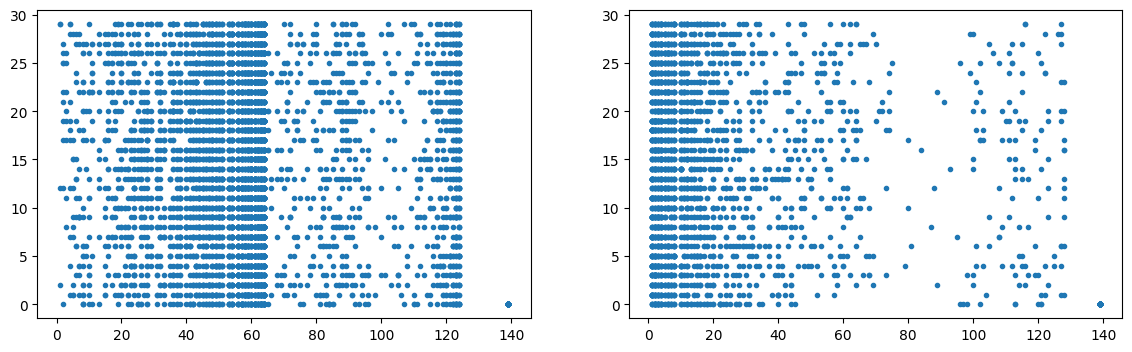

In [36]:
ns = df['FPGA'].unique()
gdf = df.groupby(['FPGA'])
fig, ax = plt.subplots( nrows=1, ncols = len(ns), figsize = (14,4) )
for j,n in enumerate(ns):
    filtered = gdf.get_group(j)
    ax[j].plot(filtered["TDC_CHANNEL"],filtered["TDC_MEAS"],'.')

### 8\.
Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [37]:
gdf = df.groupby(['FPGA'])#Group the data on the basis of FPGA 0 or 1.
df0 = gdf.get_group(0)#Get only the dataframe corresponding to 0
df1 = gdf.get_group(1)#Get only the dataframe corresponding to 1
print(df0.sort_values(by='TDC_MEAS',ascending=False).head(3),'\n')
print(df1.sort_values(by='TDC_MEAS',ascending=False).head(3))

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
5073     0     0           64  3869200218         781        29
5724     1     0          123  3869200224        3349        29
7864     1     0           91  3869200245        1838        29 

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
8606     0     1           62  3869200253        1360        29
6855     1     1            1  3869200235        3028        29
5281     0     1           12  3869200220         333        29


### 9\.
Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139